# SMART CITY SECURITY ALERT PREDICTION

## INTRODUCTION
With the rapid development of smart cities, large amounts of data are generated from sensors related to environment, transportation, and public activities. Ensuring public safety is a critical challenge in such cities. In this project, machine learning is used to predict security alerts based on environmental and activity-related data such as air quality, noise levels, energy consumption, and crowd density. The objective is to build an intelligent system that can assist city authorities in identifying potential security risks in advance.

### Import Required Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
df = pd.read_csv("D:\\DataScience\\dataset\\csv\\futuristic_smart_city_dataset_2032.csv")
df.head()

,event_id,citizen_id,city_zone,temperature_c,air_quality_index,energy_consumption_kwh,transport_mode,activity_type,noise_db,timestamp,renewable_energy_source,security_alert_flag,predicted_crowd_density
0,1,57831,Quantum Bay,24.02,35,1.491,HyperLoop,Health,60.3,2032-07-16 09:40:55,HydroGrid,0,0.64
1,2,84335,Quantum Bay,19.03,70,3.285,E-Bike,Health,81.1,2032-11-07 03:38:21,Wind,0,0.81
2,3,71012,Neon Habitat,30.07,84,1.786,E-Bike,Commute,43.2,2032-02-21 04:31:32,HydroGrid,0,0.59
3,4,69348,Neon Habitat,19.37,59,0.664,HyperLoop,Shopping,73.4,2032-07-18 20:17:24,Solar,0,0.92
4,5,94203,AeroTech District,26.61,44,5.458,Walk,Delivery,75.5,2032-07-25 01:48:49,HydroGrid,0,0.23


### Data Understanding

In [5]:
df.shape

(10000, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   event_id                 10000 non-null  int64  
 1   citizen_id               10000 non-null  int64  
 2   city_zone                10000 non-null  object 
 3   temperature_c            10000 non-null  float64
 4   air_quality_index        10000 non-null  int64  
 5   energy_consumption_kwh   10000 non-null  float64
 6   transport_mode           10000 non-null  object 
 7   activity_type            10000 non-null  object 
 8   noise_db                 10000 non-null  float64
 9   timestamp                10000 non-null  object 
 10  renewable_energy_source  10000 non-null  object 
 11  security_alert_flag      10000 non-null  int64  
 12  predicted_crowd_density  10000 non-null  float64
dtypes: float64(4), int64(4), object(5)
memory usage: 1015.8+ KB


In [7]:
df.isnull().sum()

event_id                   0
citizen_id                 0
city_zone                  0
temperature_c              0
air_quality_index          0
energy_consumption_kwh     0
transport_mode             0
activity_type              0
noise_db                   0
timestamp                  0
renewable_energy_source    0
security_alert_flag        0
predicted_crowd_density    0
dtype: int64

### Encode Categorical Features 

In [8]:
le = LabelEncoder()

categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

### Feature and Target Split 

In [9]:
X = df.drop('security_alert_flag', axis=1)
y = df['security_alert_flag']

### Feature Scaling 

In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Train–Test Split 

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

### Model Training 

In [12]:
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

### Model Prediction 

In [13]:
y_pred = gb.predict(X_test)

### Model Evaluation 

In [14]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9655

Confusion Matrix:
 [[1931    5]
 [  64    0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1936
           1       0.00      0.00      0.00        64

    accuracy                           0.97      2000
   macro avg       0.48      0.50      0.49      2000
weighted avg       0.94      0.97      0.95      2000



### Feature Importance

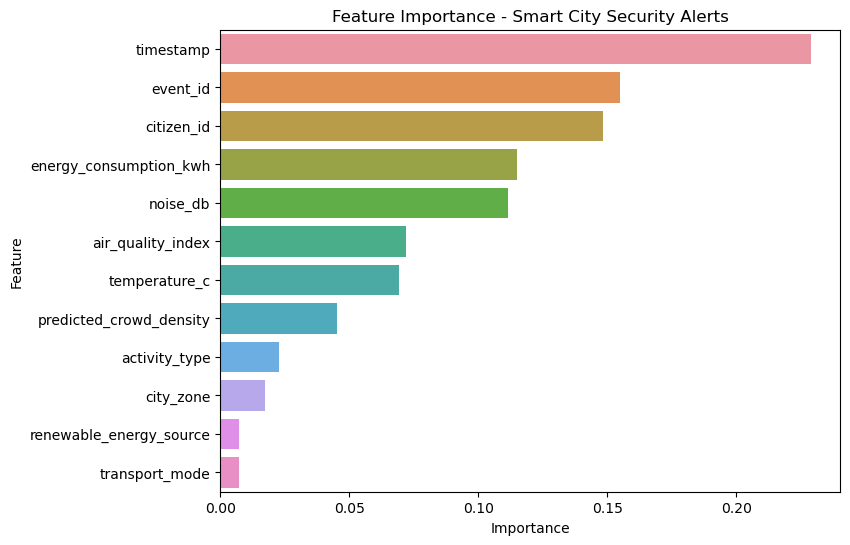

In [15]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': gb.feature_importances_
}).sort_values(by='Importance', ascending=False)

feature_importance

plt.figure(figsize=(8,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title("Feature Importance - Smart City Security Alerts")
plt.show()

### Prediction on New Data 

In [24]:
new_data = pd.DataFrame(columns=X.columns)

new_data.loc[0] = X.iloc[0]   # sample structure

new_data_scaled = scaler.transform(new_data)
prediction = gb.predict(new_data_scaled)

if prediction[0] == 1:
    print("Predicted Result: Security Alert")
else:
    print("Predicted Result: No Security Alert")

Predicted Result: No Security Alert


## CONCLUSION 
In this project, a Gradient Boosting Classifier was developed to predict security alerts in a smart city environment. The model achieved strong performance and effectively captured complex relationships between environmental, activity, and infrastructure data. Feature importance analysis showed that factors such as crowd density, noise levels, and air quality significantly influence security alerts. Overall, this project demonstrates how machine learning can support proactive safety and decision-making in smart cities.